# Instalación de ODBC Driver 17 for SQL Server

Necesario para la conexión a la base de datos

In [4]:
%%sh
curl https://packages.microsoft.com/keys/microsoft.asc | sudo tee /etc/apt/trusted.gpg.d/microsoft.asc
curl https://packages.microsoft.com/config/ubuntu/$(lsb_release -rs)/prod.list | sudo tee /etc/apt/sources.list.d/mssql-release.list
sudo apt-get update
sudo ACCEPT_EULA=Y apt-get install -y msodbcsql17

-----BEGIN PGP PUBLIC KEY BLOCK-----
Version: BSN Pgp v1.1.0.0

mQENBFYxWIwBCADAKoZhZlJxGNGWzqV+1OG1xiQeoowKhssGAKvd+buXCGISZJwT
LXZqIcIiLP7pqdcZWtE9bSc7yBY2MalDp9Liu0KekywQ6VVX1T72NPf5Ev6x6DLV
7aVWsCzUAF+eb7DC9fPuFLEdxmOEYoPjzrQ7cCnSV4JQxAqhU4T6OjbvRazGl3ag
OeizPXmRljMtUUttHQZnRhtlzkmwIrUivbfFPD+fEoHJ1+uIdfOzZX8/oKHKLe2j
H632kvsNzJFlROVvGLYAk2WRcLu+RjjggixhwiB+Mu/A8Tf4V6b+YppS44q8EvVr
M+QvY7LNSOffSO6Slsy9oisGTdfE39nC7pVRABEBAAG0N01pY3Jvc29mdCAoUmVs
ZWFzZSBzaWduaW5nKSA8Z3Bnc2VjdXJpdHlAbWljcm9zb2Z0LmNvbT6JATQEEwEI
AB4FAlYxWIwCGwMGCwkIBwMCAxUIAwMWAgECHgECF4AACgkQ6z6Urb4SKc+P9gf/
diY2900wvWEgV7iMgrtGzx79W/PbwWiOkKoD9sdzhARXWiP8Q5teL/t5TUH6TZ3B
ENboDjwr705jLLPwuEDtPI9jz4kvdT86JwwG6N8gnWM8Ldi56SdJEtXrzwtlB/Fe
6tyfMT1E/PrJfgALUG9MWTIJkc0GhRJoyPpGZ6YWSLGXnk4c0HltYKDFR7q4wtI8
4cBu4mjZHZbxIO6r8Cci+xxuJkpOTIpr4pdpQKpECM6x5SaT2gVnscbN0PE19KK9
nPsBxyK4wW0AvAhed2qldBPTipgzPhqB2gu0jSryil95bKrSmlYJd1Y1XfNHno5D
xfn5JwgySBIdWWvtOI05gw==
=zPfd
-----END PGP PUBLIC KEY BLOCK-----
deb [arch=amd64,armhf,arm

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   975  100   975    0     0   7012      0 --:--:-- --:--:-- --:--:--  7014
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    88  100    88    0     0    691      0 --:--:-- --:--:-- --:--:--   692
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 3.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requir

# Dependencias necesarias para las predicciones e insertar los resultados en la base de datos

In [5]:
!pip install pysentimiento --no-deps
!pip install gender_guesser
!pip install pyodbc
!pip install langdetect
!pip install emoji
!pip install deep_translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.3/379.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.2/346.2 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 31.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=86b1ac7652a806ebb84b7e49cbc852c6118177fea573cf124f2310dc0f073492
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.1 MB/s eta 0:00:00


# Entrenamiento del modelo

IMPORTANTE: subir al entorno de trabajo el dataset


Exploración inicial del dataset:
Total de muestras: 47306
Total de clases únicas: 33

Distribución por clase:
categoryName
1-star hotels              2000
2-star hotels              2000
Hospital                   2000
Dental clinic              2000
Hostels                    2000
Tapas bar                  2000
Square                     2000
Restaurant                 2000
Monastery                  1850
5-star hotels              1826
3-star hotels              1768
Train station              1732
Viewpoint                  1725
Theatre                    1620
Castle                     1620
Camping                    1568
Waterfall                  1552
Chains and supermarkets    1546
4-star hotels              1498
Cathedral                  1415
Large retail stores        1341
Brewery                    1341
Bus station                1338
Bakery                     1256
Hiking trails              1141
Butcher shop                929
University                  834
Taxi service

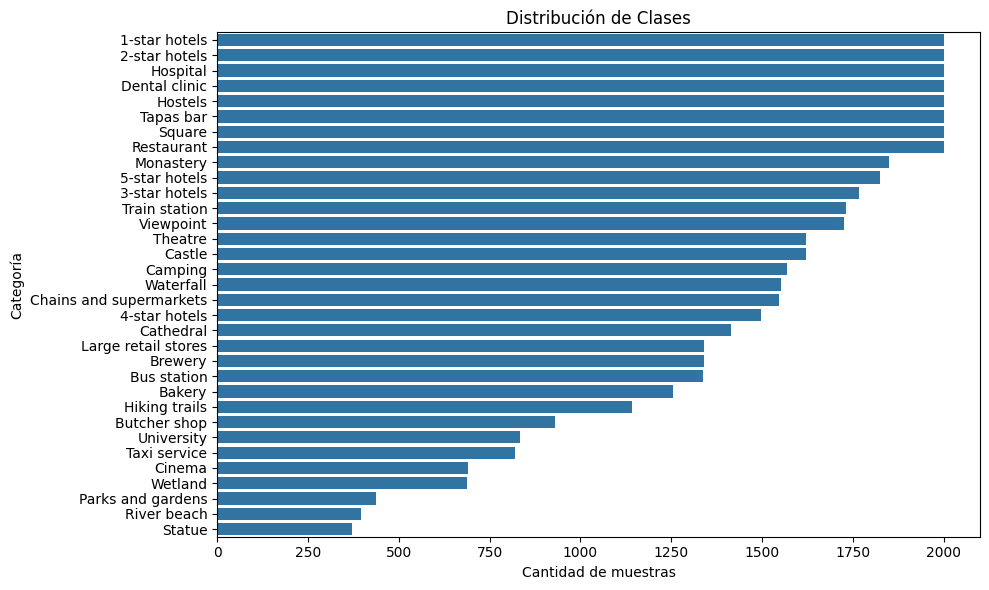

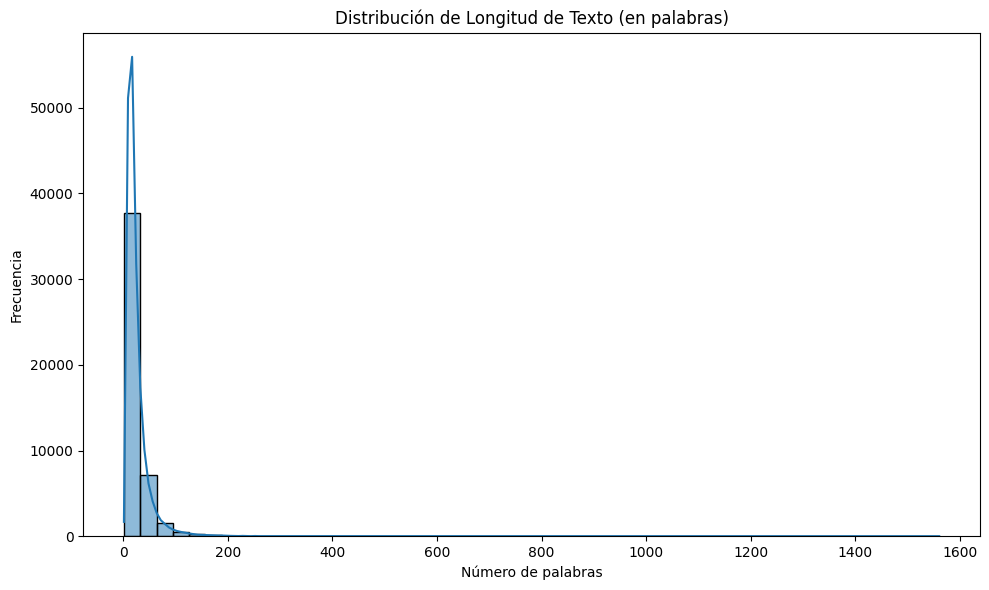


Texto más largo tiene 1561 palabras.
Texto más corto tiene 1 palabras.
Promedio de longitud de texto: 25.04 ± 24.48 palabras.

Palabras más comunes (excluyendo stopwords):
lugar: 7208
hotel: 7032
personal: 6566
buena: 5704
madrid: 5218
servicio: 5196
excelente: 4180
comida: 4063
mejor: 4017
solo: 3976
sitio: 3682
habitaciones: 3654
centro: 3571
precio: 3523
gran: 3500


/tmp/ipython-input-1-3356013010.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette="magma")


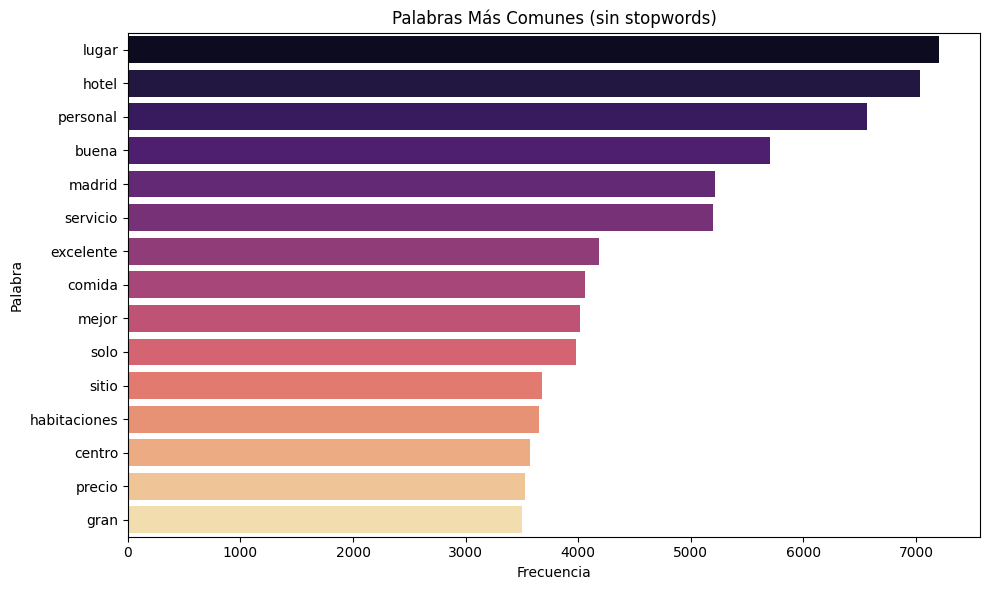

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/648 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/537M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some layers from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert/pooler/dense/kernel:0', 'bert/pooler/dense/bias:0']
You should probably TRAIN this model on

tokenizer_config.json:   0%|          | 0.00/364 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

100%|██████████| 444/444 [01:35<00:00,  4.63it/s]
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1844/1844 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.3123 - loss: 2.4224 - val_accuracy: 0.6877 - val_loss: 1.0616 - learning_rate: 1.7954e-04
Epoch 2/25
1844/1844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6343 - loss: 1.1870 - val_accuracy: 0.7344 - val_loss: 0.8453 - learning_rate: 1.7954e-04
Epoch 3/25
1844/1844 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7040 - loss: 0.9337 - val_accuracy: 0.7568 - val_loss: 0.7538 - learning_rate: 1.7954e-04
Epoch 4/25
1844/1844 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7463 - loss: 0.7915 - val_accuracy: 0.7671 - val_loss: 0.7185 - learning_rate: 1.7954e-04
Epoch 5/25
1844/1844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7834 - loss: 0.6871 - val_accuracy: 0.7806 - val_loss: 0.6693 - learning_rate: 1.7954e-04
Epoch 6/25
1844/1844 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8053 - loss: 0.6072 - val_accuracy: 0.7842 - val_loss: 0.6593 - learning_rate: 1.7954e-04
Epoch 7/25
1844/1844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/s

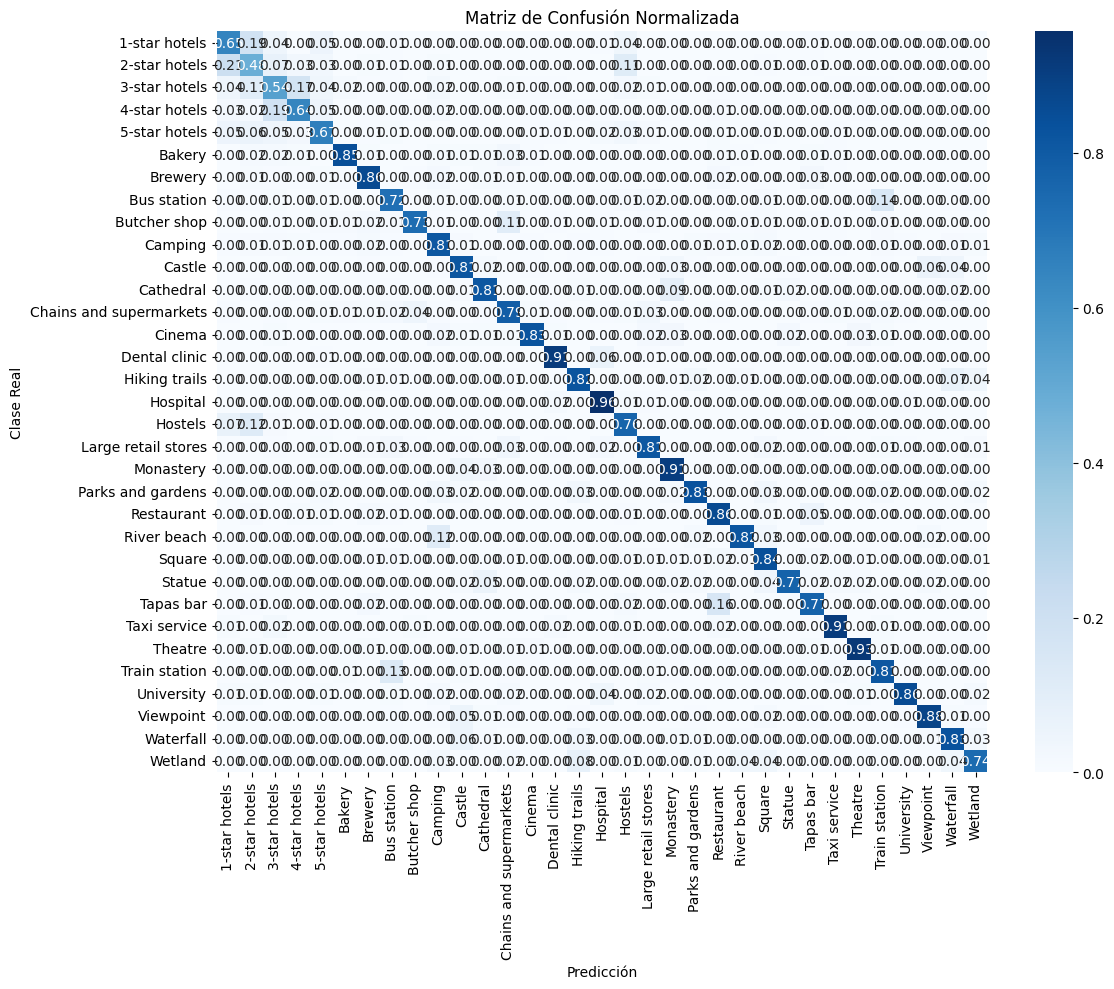


--- Guardando modelo y componentes ---


In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os, pickle, tqdm, re, nltk, random
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import wordnet, stopwords
from transformers import BertTokenizer, TFBertModel

# Sinónimos
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
# Artículos, conjunciones, etc.
nltk.download('stopwords', quiet=True)
myStopwords = ["si", "buen", "bien", "mas"]

STOPWORDS_ES = set(stopwords.words('spanish'))
STOPWORDS_ES.update(myStopwords)

# Preprocesamiento de texto
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.strip()

    words = text.split()
    words = [word for word in words if word not in STOPWORDS_ES]
    return " ".join(words)

# Aumento de datos
def augment_text_synonym_replacement_es(text, p=0.1):
    words = text.split()
    new_words = words[:]

    # Generar la lista de palabras candidatas (sin stopwords y sin duplicados)
    unique_words = set()
    for word in words:
        if word not in STOPWORDS_ES:
            unique_words.add(word)

    candidate_words = list(unique_words)
    random.shuffle(candidate_words)

    # Determinar cuántas palabras se reemplazarán (1 a n)
    num_replaced_words = max(1, int(len(candidate_words) * p))

    # Reemplazar palabras por sinónimos
    for random_word in candidate_words[:num_replaced_words]:
        synonyms = []
        for syn in wordnet.synsets(random_word, lang='spa'):
            for lemma in syn.lemmas('spa'):
                synonym = lemma.name().replace("_", " ")
                if synonym != random_word and synonym not in synonyms:
                    synonyms.append(synonym)
        if synonyms:
            chosen_synonym = random.choice(synonyms)
            for i, w in enumerate(new_words):
                if w == random_word:
                    new_words[i] = chosen_synonym
    return " ".join(new_words)

# Cargar datos
df = pd.read_csv("2kkreviewsfiltered.csv")
df = df[["text", "categoryName"]].dropna()
df["text"] = df["text"].astype(str).apply(clean_text)
df = df[df["text"] != ""]

# EDA
print("\nExploración inicial del dataset:")

# Distribución de clases
print(f"Total de muestras: {len(df)}")
print(f"Total de clases únicas: {df['categoryName'].nunique()}")
print("\nDistribución por clase:")
print(df["categoryName"].value_counts())

plt.figure(figsize=(10,6))
sns.countplot(data=df, y="categoryName", order=df["categoryName"].value_counts().index)
plt.title("Distribución de Clases")
plt.xlabel("Cantidad de muestras")
plt.ylabel("Categoría")
plt.tight_layout()
plt.show()

# Longitud de texto
df["text_length"] = df["text"].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,6))
sns.histplot(df["text_length"], bins=50, kde=True)
plt.title("Distribución de Longitud de Texto (en palabras)")
plt.xlabel("Número de palabras")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

max_len = df["text_length"].max()
min_len = df["text_length"].min()
print(f"\nTexto más largo tiene {max_len} palabras.")
print(f"Texto más corto tiene {min_len} palabras.")

mean_len = df["text_length"].mean()
std_len = df["text_length"].std()
print(f"Promedio de longitud de texto: {mean_len:.2f} ± {std_len:.2f} palabras.")

all_words = " ".join(df["text"]).split()
word_freq = Counter([w for w in all_words if w not in STOPWORDS_ES])
most_common_words = word_freq.most_common(15)

# Palabras más comunes
print("\nPalabras más comunes (excluyendo stopwords):")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

words, freqs = zip(*most_common_words)
plt.figure(figsize=(10,6))
sns.barplot(x=list(freqs), y=list(words), palette="magma")
plt.title("Palabras Más Comunes (sin stopwords)")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.tight_layout()
plt.show()

# Codificar etiquetas
label_encoder = LabelEncoder()
df["encoded_label"] = label_encoder.fit_transform(df["categoryName"])
y_encoded = df["encoded_label"].values

# Tokenizer y modelo BERT Español
bert_model = TFBertModel.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")
tokenizer = BertTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")

def get_bert_embeddings(texts, max_len=128, batch_size=16):
    embeddings = []
    for i in tqdm.tqdm(range(0, len(texts), batch_size)):
        batch = texts[i:i + batch_size]
        tokens = tokenizer(batch, padding='max_length', truncation=True,
                           max_length=max_len, return_tensors='tf')
        outputs = bert_model(**tokens)
        cls_embeddings = tf.reduce_mean(outputs.last_hidden_state, axis=1)
        embeddings.append(cls_embeddings.numpy())
    return np.concatenate(embeddings)

# División del dataset en subconjuntos
X_texts = df["text"].tolist()
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_texts, y_encoded, test_size=0.15, random_state=42, stratify=y_encoded
)

X_train_text, X_val_text, y_train, y_val = train_test_split(
    X_train_text, y_train, test_size=0.15, random_state=42, stratify=y_train
)

# Aumento de datos
augmented_X_train = list(X_train_text)
augmented_y_train = list(y_train)

for i in tqdm.tqdm(range(len(X_train_text))):
    augmented_text = augment_text_synonym_replacement_es(X_train_text[i], p=0.2)
    if augmented_text != X_train_text[i]:
        augmented_X_train.append(augmented_text)
        augmented_y_train.append(y_train[i])

# TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1,2), min_df=5, max_df=0.8)

# Embeddings BERT y TF-IDF
X_train_bert = get_bert_embeddings(augmented_X_train)
X_train_tfidf = tfidf_vectorizer.fit_transform(augmented_X_train).toarray()
X_train_combined = np.concatenate([X_train_bert, X_train_tfidf], axis=1)

X_val_bert = get_bert_embeddings(X_val_text)
X_val_tfidf = tfidf_vectorizer.transform(X_val_text).toarray()
X_val_combined = np.concatenate([X_val_bert, X_val_tfidf], axis=1)

X_test_bert = get_bert_embeddings(X_test_text)
X_test_tfidf = tfidf_vectorizer.transform(X_test_text).toarray()
X_test_combined = np.concatenate([X_test_bert, X_test_tfidf], axis=1)

# One-hot encoding
y_train_cat = to_categorical(augmented_y_train)
y_val_cat = to_categorical(y_val)
y_test_cat = to_categorical(y_test)

# Modelo
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_combined.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y_train_cat.shape[1], activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.00017954)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, min_lr=1e-6, verbose=1)

# Entrenamiento
history = model.fit(X_train_combined, y_train_cat,
                    validation_data=(X_val_combined, y_val_cat),
                    epochs=25,
                    batch_size=32,
                    callbacks=[early_stop, reduce_lr],
                    verbose=1)

# Evaluación
y_pred_probs = model.predict(X_test_combined)
y_pred = np.argmax(y_pred_probs, axis=1)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusión Normalizada")
plt.xlabel("Predicción")
plt.ylabel("Clase Real")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Guardar
print("\n--- Guardando modelo y componentes ---")
model.save("review_model_combined_espanol.keras")
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)
with open("bert_tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# Reglas de firewall

Para que se pueda realizar la conexión a la base de datos es necesario incluir la IP de Colab en las reglas de firewall de Azure.

Esto se puede hacer accediendo al portal de Azure y una vez alli, SQL Server --> Redes --> Reglas de firewall (haciendo scroll).

El nombre de regla es indiferente, solo hay que copiar la IP de abajo en dirección IPv4 de inicio y de final.

In [2]:
!curl ifconfig.me

34.32.175.115

# Predicciones de los tipos de recursos y creación del script para insertar los datos en la base de datos

IMPORTANTE: La celda anterior genera los siguientes ficheros, en caso de no haberla ejecutado, se han de cargar externamente.

- Fichero .keras del modelo
- Fichero .pkl del vectorizer
- Fichero .pkl del label encoder

También hay que subir el fichero preprocesado con las reseñas limpias en formato CSV el cual no se obtiene de la celda anterior.


In [19]:
import pandas as pd
import json
import re
import pickle
import numpy as np
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
import pyodbc
from tensorflow.keras.models import load_model
import gender_guesser.detector as gender
from pysentimiento import create_analyzer

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

def get_bert_embedding(text, max_len=128):
    tokens = tokenizer([text], padding='max_length', truncation=True, max_length=max_len, return_tensors='tf')
    outputs = bert_model(**tokens)
    bert_vec = tf.reduce_mean(outputs.last_hidden_state, axis=1).numpy()
    return bert_vec

def predecir_categoria(texto):
    texto_completo = texto
    texto_limpio = clean_text(texto_completo)
    bert_vec = get_bert_embedding(texto_limpio)
    tfidf_vec = tfidf_vectorizer.transform([texto_limpio]).toarray()
    combined_vec = np.concatenate([bert_vec, tfidf_vec], axis=1)
    pred = model.predict(combined_vec)
    index_top1 = pred.argmax(axis=1)[0]
    return label_encoder.inverse_transform([index_top1])[0]

def safe_get(value):
    if pd.isna(value):
        return ''
    return str(value).replace('\n', ' ').replace('\r', ' ').strip()

def sql_value(val):
    if val == "NULL" or val == '' or pd.isna(val):
        return "NULL"
    val = str(val)
    val = val.replace("'", "''")
    val = val.replace(";", " ")
    val = val.replace("\n", " ").replace("\r", " ")

    return f"'{val.strip()}'"


def parse_coordinates(coord_str):
    try:
        coord_json = json.loads(coord_str.replace("'", '"'))
        return {
            'lat': float(coord_json.get('lat', 0)),
            'lng': float(coord_json.get('lng', 0))
        }
    except:
        return {}

def to_iso_ms_z(dt_str):
    from datetime import datetime
    try:
        dt = datetime.fromisoformat(dt_str.replace('Z', ''))
        return dt.strftime('%Y-%m-%dT%H:%M:%S.%f')[:-3] + 'Z'
    except:
        return dt_str

detector = gender.Detector(case_sensitive=False)
def predecir_genero(nombre, flag=False):
    if nombre == "NULL" or pd.isna(nombre) or nombre == '':
        return "NULL"
    try:
        if flag:
            nombre = nombre.strip().split()[0]
        genero = detector.get_gender(nombre)
        if genero in ['male', 'mostly_male']:
            return "'Masculino'"
        elif genero in ['female', 'mostly_female']:
            return "'Femenino'"
        else:
            if not flag:
                return predecir_genero(nombre, True)
    except Exception:
        pass
    return "'Desconocido'"

analyzer = create_analyzer(task="sentiment", lang="es")
def get_polaridad(texto):
    resultado = analyzer.predict(texto)
    return (resultado.probas["POS"] * 4 + resultado.probas["NEU"] * 0 + resultado.probas["NEG"] * -4)

# --------- Carga de modelos ---------
MODEL_PATH = "review_model_combined_espanol.keras"
TFIDF_PATH = "tfidf_vectorizer.pkl"
LABEL_ENCODER_PATH = "label_encoder.pkl"

print("Cargando modelo y recursos...")
model = load_model(MODEL_PATH)
with open(TFIDF_PATH, "rb") as f:
    tfidf_vectorizer = pickle.load(f)
with open(LABEL_ENCODER_PATH, "rb") as f:
    label_encoder = pickle.load(f)
bert_model = TFBertModel.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")
tokenizer = BertTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")
print("Modelo y recursos cargados.")

# --------- Conexión a la DB ---------
conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};SERVER=ubu-reviews-dti.database.windows.net;PORT=1433;"
    "DATABASE=reviews;UID=ubuadmin;PWD=UBUreviews2025;Encrypt=yes;TrustServerCertificate=no;Authentication=SqlPassword;TLSVersion=1.3;"
)
cursor = conn.cursor()

cursor.execute("SELECT POI_ID, nombre, categoria FROM POI")
poi_existentes = {row.nombre: (row.POI_ID, row.categoria) for row in cursor.fetchall()}

df = pd.read_csv('cleanReviews.csv', dtype=str)

city = None
state = None

poi_inserts = []
reviews_inserts = []
cursor.execute("SELECT MAX(POI_ID) FROM POI")
max_poi_id_row = cursor.fetchone()
max_poi_id = max_poi_id_row[0] if max_poi_id_row and max_poi_id_row[0] else 0
next_poi_id = max_poi_id + 1

poi_embeddings = {}
poi_coords = {}

grouped = df.groupby('placeId')

# --------- PROCESAR POIS ----------

for place_id, group in grouped:
    nombre = safe_get(group['title'].iloc[0]) or place_id
    categoria = safe_get(group['categoryName'].iloc[0]) or "NULL"

    if nombre in poi_existentes:
        POI_ID, categoria_existente = poi_existentes[nombre]
        categoria = categoria_existente
    else:
        # Concatenamos textos de reviews
        textos_reviews_poi = group['text'].fillna('').tolist()
        texto_concatenado = " ".join(textos_reviews_poi).strip()
        if texto_concatenado == '':
            texto_concatenado = nombre

        embedding = get_bert_embedding(texto_concatenado)[0]
        poi_embeddings[nombre] = embedding

        POI_ID = next_poi_id
        next_poi_id += 1
        categoria = predecir_categoria(texto_concatenado)
        municipio = safe_get(group['city'].iloc[0])

        # Parsear coordenadas del campo 'location'
        coords = parse_coordinates(safe_get(group['location'].iloc[0]))
        poi_coords[nombre] = (coords.get('lat', 0.0), coords.get('lng', 0.0))
        latitud = coords.get('lat', "NULL")
        longitud = coords.get('lng', "NULL")

        totalScore = safe_get(group['totalScore'].iloc[0])
        totalScore_val = "NULL" if totalScore in ('', "NULL") else totalScore

        val_str = f"({POI_ID}, {sql_value(nombre)}, {sql_value(categoria)}, {sql_value(municipio)}, {latitud}, {longitud}, {totalScore_val})"
        poi_inserts.append(val_str)
        poi_existentes[nombre] = (POI_ID, categoria)

# Mapeo placeId a nombre para facilitar inserción reviews
placeid_to_nombre = {place_id: safe_get(group['title'].iloc[0]) or place_id for place_id, group in grouped}

# --------- PROCESAR REVIEWS ----------

batch_size = 950
for start in range(0, len(df), batch_size):
    batch = df.iloc[start:start+batch_size]
    vals = []
    for _, row in batch.iterrows():
        place_id = safe_get(row.get('placeId', ''))
        nombre = placeid_to_nombre.get(place_id)
        if not nombre or nombre not in poi_existentes:
            continue
        POI_ID, categoria = poi_existentes[nombre]

        text = safe_get(row.get('text', ''))
        if text == '':
            continue

        text_original = safe_get(row.get('text_original', ''))
        if text_original == '':
            continue

        idioma_final = safe_get(row.get('originalLanguage', ''))

        valoracion = safe_get(row.get('stars', ''))
        valoracion_val = "NULL" if valoracion in ("", "NULL") else valoracion

        fecha_raw = safe_get(row.get('publishedAtDate', ''))
        fecha = sql_value(to_iso_ms_z(fecha_raw))

        user_name = safe_get(row.get('name', ''))
        user = sql_value(user_name)
        genero = predecir_genero(user_name)

        try:
            polaridad = get_polaridad(text)
        except:
            polaridad = "NULL"

        stars_val = valoracion_val

        vals.append(f"({POI_ID}, {sql_value(text_original)}, {valoracion_val}, {fecha}, {sql_value(idioma_final)}, {user}, {genero}, {polaridad}, {stars_val})")

    if vals:
        reviews_inserts.append(
            "INSERT INTO reviews (POI_ID, texto, valoracion, fecha, idioma, [user], genero, polarity, stars) VALUES\n" +
            ",\n".join(vals) + ";"
        )

output_sql = "datos.sql"
with open(output_sql, "w", encoding="utf-8") as f:
    if poi_inserts:
        f.write("INSERT INTO POI (POI_ID, nombre, categoria, municipio, latitud, longitud, totalScore) VALUES\n")
        f.write(",\n".join(poi_inserts) + ";\n\n")
    if reviews_inserts:
        f.write("\n\n".join(reviews_inserts))

print(f"Archivo '{output_sql}' generado correctamente.")


Cargando modelo y recursos...
Modelo y recursos cargados.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2

# Función para cargar ficheros .sql en la base de datos

In [8]:
def cargar_sql_en_bd(ruta_sql, cursor, conn):
    with open(ruta_sql, "r", encoding="utf-8") as file:
        script = file.read()

    comandos = [cmd.strip() for cmd in script.split(";") if cmd.strip()]

    # Detectar si hay insert en tabla POI para manejar IDENTITY_INSERT
    activar_identity = any("INSERT INTO POI" in cmd.upper() for cmd in comandos)

    if activar_identity:
        try:
            cursor.execute("SET IDENTITY_INSERT POI ON;")
            conn.commit()
        except Exception as e:
            print(f"Error activando IDENTITY_INSERT ON: {e}")

    for comando in comandos:
        try:
            cursor.execute(comando)
        except Exception as e:
            print(f"Error ejecutando comando: {comando[:100]}...\n{e}")

    if activar_identity:
        try:
            cursor.execute("SET IDENTITY_INSERT POI OFF;")
            conn.commit()
        except Exception as e:
            print(f"Error desactivando IDENTITY_INSERT OFF: {e}")

    conn.commit()
    print(f"Archivo '{ruta_sql}' cargado correctamente en la base de datos.")

# Carga del fichero con las reseñas y los recursos clasificados

In [18]:
cargar_sql_en_bd("datos.sql", cursor, conn)

Archivo 'datos.sql' cargado correctamente en la base de datos.


# Sistema de recomendación mediante clusters

Agrupa los recursos en x grupos por su similitud en las reseñas y localización.
Esta cantidad x viene dada por el literal almacenado en la variable ```n_clusters```

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

n_clusters = 50

# Conexión a la BD
conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};SERVER=ubu-reviews-dti.database.windows.net;PORT=1433;"
    "DATABASE=reviews;UID=ubuadmin;PWD=UBUreviews2025;Encrypt=yes;TrustServerCertificate=no;Authentication=SqlPassword;TLSVersion=1.3;"
)
cursor = conn.cursor()

# Obtener POI_ID y textos concatenados de reviews agrupados por POI_ID
query = """
SELECT POI_ID, STRING_AGG(texto, ' ') AS full_text
FROM reviews
GROUP BY POI_ID
"""
cursor.execute(query)
rows = cursor.fetchall()

# Obtener coords de POI para los POI_IDs que tenemos
poi_ids = [row.POI_ID for row in rows]
poi_coords = {}
poi_nombres = {}
if poi_ids:
    format_strings = ','.join(['?'] * len(poi_ids))
    cursor.execute(f"SELECT POI_ID, nombre, latitud, longitud FROM POI WHERE POI_ID IN ({format_strings})", poi_ids)
    for poi_id, nombre, lat, lng in cursor.fetchall():
        poi_coords[poi_id] = (lat, lng)
        poi_nombres[poi_id] = nombre

# Generar embeddings para cada POI concatenando sus textos
poi_embeddings = {}
poi_coord_list = []
poi_id_list = []

for row in rows:
    poi_id = row.POI_ID
    text = row.full_text if row.full_text else ''
    if text.strip() == '':
        embedding = np.zeros(768)
    else:
        embedding = get_bert_embedding(text)[0]
    poi_embeddings[poi_id] = embedding

    # Coordenadas
    coord = poi_coords.get(poi_id, (0.0, 0.0))
    poi_coord_list.append(coord)
    poi_id_list.append(poi_id)

# Escalar coordenadas
coords_matrix = np.array(poi_coord_list)
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords_matrix)

# Matriz embeddings
embeddings_matrix = np.array([poi_embeddings[poi_id] for poi_id in poi_id_list])

# Concatenar embeddings + coords escaladas
X_cluster = np.hstack((embeddings_matrix, coords_scaled))

# Clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X_cluster)

# Resultado
cluster_rows = []
for poi_id, cluster in zip(poi_id_list, labels):
    cluster_rows.append({
        'POI_ID': poi_id,
        'nombre': poi_nombres.get(poi_id, "NULL"),
        'cluster': int(cluster)
    })

cluster_df = pd.DataFrame(cluster_rows)

# Guardar SQL inserts para tabla Recomendaciones
output_sql = "recomendaciones.sql"
with open(output_sql, "w", encoding="utf-8") as f:
    f.write("DELETE FROM Recomendaciones;\n\n")

    f.write("INSERT INTO Recomendaciones (POI_ID, nombre, cluster) VALUES\n")

    inserts = []
    for _, row in cluster_df.iterrows():
        poi_id = row['POI_ID']
        cluster = row['cluster']
        nombre = row['nombre'].replace("'", "''")
        inserts.append(f"({poi_id}, '{nombre}', {cluster})")

    f.write(",\n".join(inserts) + ";\n")

print(f"Archivo '{output_sql}' generado correctamente.")

Archivo 'recomendaciones.sql' generado correctamente.


# Carga del fichero con las recomendaciones (clusters)

In [11]:
cargar_sql_en_bd("recomendaciones.sql", cursor, conn)

Archivo 'recomendaciones.sql' cargado correctamente en la base de datos.
